In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('2016_Building_Energy_Benchmarking.csv', sep=',')

# Description du dataset

In [3]:
df.shape

(3376, 46)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [5]:
df.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,...,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,...,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,...,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,...,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,...,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [6]:
types=df.dtypes

## Exploration des variables de types objet

In [7]:
object_columns=types[types=='object'].index

In [8]:
df[object_columns].head()

,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,YearsENERGYSTARCertified,ComplianceStatus,Outlier
0,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,0659000030,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
1,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,0659000220,DOWNTOWN,"Hotel, Parking, Restaurant",Hotel,Parking,Restaurant,NaN,Compliant,NaN
2,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,0659000475,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
3,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,0659000640,DOWNTOWN,Hotel,Hotel,NaN,NaN,NaN,Compliant,NaN
4,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,0659000970,DOWNTOWN,"Hotel, Parking, Swimming Pool",Hotel,Parking,Swimming Pool,NaN,Compliant,NaN


In [9]:
for col in object_columns:
    print(col)
    print(df[col].value_counts())
    print('-------------')

BuildingType
NonResidential          1460
Multifamily LR (1-4)    1018
Multifamily MR (5-9)     580
Multifamily HR (10+)     110
SPS-District K-12         98
Nonresidential COS        85
Campus                    24
Nonresidential WA          1
Name: BuildingType, dtype: int64
-------------
PrimaryPropertyType
Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse 

## Garder les information sur les batiments non- residentiels

In [10]:
df.loc[df['LargestPropertyUseType']=='Multifamily Housing', 'ListOfAllPropertyUseTypes'].value_counts()

Multifamily Housing                                                                                          860
Multifamily Housing, Parking                                                                                 464
Multifamily Housing, Retail Store                                                                             52
Multifamily Housing, Parking, Retail Store                                                                    50
Multifamily Housing, Office, Parking                                                                          38
                                                                                                            ... 
Financial Office, Multifamily Housing, Parking, Retail Store, Supermarket/Grocery Store                        1
Financial Office, Multifamily Housing, Parking, Supermarket/Grocery Store                                      1
Food Sales, Multifamily Housing, Parking                                                        

In [11]:
df=df[~df['ListOfAllPropertyUseTypes'].isin(['Multifamily Housing', 'Multifamily Housing, Parking'])]
df.shape

(2046, 46)

## Valeurs dupliquees

In [12]:
df[df[['PropertyName','Address']].duplicated(keep=False)]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,...,Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity


## Valeurs manquantes

In [13]:
df[object_columns].isna().mean().sort_values(ascending=False)

Outlier                          0.988759
YearsENERGYSTARCertified         0.948680
ThirdLargestPropertyUseType      0.711144
SecondLargestPropertyUseType     0.408602
LargestPropertyUseType           0.006843
ListOfAllPropertyUseTypes        0.004399
BuildingType                     0.000000
PrimaryPropertyType              0.000000
PropertyName                     0.000000
Address                          0.000000
City                             0.000000
State                            0.000000
TaxParcelIdentificationNumber    0.000000
Neighborhood                     0.000000
ComplianceStatus                 0.000000
dtype: float64

### Outlier: 
NaN sont pour les proprietes qui n'ont pas des valerus aberrantes (remplissage normale)

In [14]:
df.loc[df['Outlier'].isna(), 'Outlier']='Normal'

### YearsENERGYSTARCertified
les annees les proprietes ont eu la certification ENERGYSTar

In [15]:
df.loc[df['YearsENERGYSTARCertified'].isna(),'YearsENERGYSTARCertified']='None'

### ThirdLargestPropertyUseType et  SecondLargestPropertyUseType

In [16]:
df.loc[df['ThirdLargestPropertyUseType'].isna(),'ThirdLargestPropertyUseType']='None'
df.loc[df['SecondLargestPropertyUseType'].isna(),'SecondLargestPropertyUseType']='None'

### LargestPropertyUseType et ListOfAllPropertyUseTypes

In [17]:
df.loc[df['LargestPropertyUseType'].isna(), 'LargestPropertyUseType']=df.loc[df['LargestPropertyUseType'].isna(), 'PrimaryPropertyType']
df.loc[df['ListOfAllPropertyUseTypes'].isna(), 'ListOfAllPropertyUseTypes']=df.loc[df['ListOfAllPropertyUseTypes'].isna(), 'PrimaryPropertyType']

In [18]:
df[object_columns].isna().mean().sort_values(ascending=False)

BuildingType                     0.0
PrimaryPropertyType              0.0
PropertyName                     0.0
Address                          0.0
City                             0.0
State                            0.0
TaxParcelIdentificationNumber    0.0
Neighborhood                     0.0
ListOfAllPropertyUseTypes        0.0
LargestPropertyUseType           0.0
SecondLargestPropertyUseType     0.0
ThirdLargestPropertyUseType      0.0
YearsENERGYSTARCertified         0.0
ComplianceStatus                 0.0
Outlier                          0.0
dtype: float64

# Variables de types floats

In [19]:
floats_columns=types[types=='float64'].index

In [21]:
df[floats_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ZipCode,2030.0,9.811672e+04,1.831870e+01,98006.00000,9.810400e+04,9.811200e+04,9.812200e+04,9.820400e+04
Latitude,2046.0,4.761843e+01,4.765877e-02,47.49917,4.759406e+01,4.761389e+01,4.765171e+01,4.773387e+01
Longitude,2046.0,-1.223332e+02,2.501140e-02,-122.41182,-1.223447e+02,-1.223330e+02,-1.223210e+02,-1.222210e+02
NumberofBuildings,2038.0,1.143768e+00,2.655741e+00,0.00000,1.000000e+00,1.000000e+00,1.000000e+00,1.110000e+02
LargestPropertyUseTypeGFA,2032.0,9.611961e+04,2.539162e+05,5656.00000,2.550000e+04,4.495400e+04,9.535850e+04,9.320156e+06
SecondLargestPropertyUseTypeGFA,1210.0,3.267839e+04,6.187339e+04,0.00000,5.253500e+03,1.135150e+04,2.956475e+04,6.867500e+05
ThirdLargestPropertyUseTypeGFA,591.0,1.180583e+04,2.944290e+04,0.00000,2.299000e+03,5.090000e+03,1.018250e+04,4.597480e+05
ENERGYSTARScore,1299.0,6.603541e+01,2.857845e+01,1.00000,4.900000e+01,7.500000e+01,9.000000e+01,1.000000e+02
SiteEUI(kBtu/sf),2040.0,6.695588e+01,6.837375e+01,0.00000,3.200000e+01,4.800000e+01,7.500000e+01,8.344000e+02
SiteEUIWN(kBtu/sf),2040.0,6.926422e+01,6.932652e+01,0.00000,3.400000e+01,5.065000e+01,7.832500e+01,8.344000e+02


## Valeurs aberrantes
**Electricity(kBtu)**, 	**Electricity(kWh)** et **SourceEUIWN(kBtu/sf)** negatifs. Une propriete a enlever du dataset	

In [22]:
df=df[df['Electricity(kWh)']>=0]

In [23]:
df[floats_columns].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ZipCode,2020.0,9.811673e+04,1.834977e+01,98006.00000,9.810400e+04,9.811200e+04,9.812200e+04,9.820400e+04
Latitude,2036.0,4.761836e+01,4.766836e-02,47.49917,4.759401e+01,4.761387e+01,4.765150e+01,4.773387e+01
Longitude,2036.0,-1.223332e+02,2.494503e-02,-122.41182,-1.223446e+02,-1.223330e+02,-1.223211e+02,-1.222210e+02
NumberofBuildings,2036.0,1.143910e+00,2.657041e+00,0.00000,1.000000e+00,1.000000e+00,1.000000e+00,1.110000e+02
LargestPropertyUseTypeGFA,2031.0,9.614322e+04,2.539765e+05,5656.00000,2.550000e+04,4.491300e+04,9.538700e+04,9.320156e+06
SecondLargestPropertyUseTypeGFA,1210.0,3.267839e+04,6.187339e+04,0.00000,5.253500e+03,1.135150e+04,2.956475e+04,6.867500e+05
ThirdLargestPropertyUseTypeGFA,591.0,1.180583e+04,2.944290e+04,0.00000,2.299000e+03,5.090000e+03,1.018250e+04,4.597480e+05
ENERGYSTARScore,1298.0,6.600924e+01,2.857389e+01,1.00000,4.900000e+01,7.450000e+01,9.000000e+01,1.000000e+02
SiteEUI(kBtu/sf),2035.0,6.706241e+01,6.842223e+01,0.00000,3.200000e+01,4.800000e+01,7.500000e+01,8.344000e+02
SiteEUIWN(kBtu/sf),2035.0,6.937459e+01,6.937366e+01,0.00000,3.400000e+01,5.070000e+01,7.840000e+01,8.344000e+02


## Valeurs manquantes

In [24]:
df[floats_columns].isna().mean().sort_values(ascending=False).head(10)

Comments                           1.000000
ThirdLargestPropertyUseTypeGFA     0.709725
SecondLargestPropertyUseTypeGFA    0.405697
ENERGYSTARScore                    0.362475
ZipCode                            0.007859
LargestPropertyUseTypeGFA          0.002456
SiteEUI(kBtu/sf)                   0.000491
SiteEUIWN(kBtu/sf)                 0.000491
SiteEnergyUseWN(kBtu)              0.000491
Electricity(kWh)                   0.000000
dtype: float64

### Comments
Competement vide, colonne a suprimer

In [25]:
df=df.drop(columns=['Comments'])

### ThirdLargestPropertyUseTypeGFA   et SecondLargestPropertyUseTypeGFA
Remplacement par 0

In [26]:
df[['ThirdLargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA']]=df[['ThirdLargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA']].fillna(0)

### ZipCode
Remplacement par la mediane

In [27]:
import numpy as np
from sklearn.impute import SimpleImputer
imp_median= SimpleImputer(missing_values=np.nan, strategy='median')
df['ZipCode']=imp_median.fit_transform(df[['ZipCode']])

### LargestPropertyUseTypeGFA
Remplacement par PropertyGFATotal

In [28]:
df.loc[df['LargestPropertyUseTypeGFA'].isna(),'LargestPropertyUseTypeGFA']=df.loc[df['LargestPropertyUseTypeGFA'].isna(),'PropertyGFATotal']

### SiteEUI(kBtu/sf)

In [29]:
df[df['SiteEUI(kBtu/sf)'].isna()][['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','SiteEnergyUse(kBtu)']]

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SiteEnergyUse(kBtu)
304,NaN,0.0,0.0,0.0,0.0,0.0


In [30]:
df.loc[df['SiteEUI(kBtu/sf)'].isna(),'SiteEUI(kBtu/sf)']=0

### SiteEUIWN(kBtu/sf)

In [31]:
df[df['SiteEUIWN(kBtu/sf)'].isna()][['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)','SiteEnergyUseWN(kBtu)','SiteEnergyUse(kBtu)']]

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SiteEnergyUse(kBtu)
563,39.5,NaN,128.0,0.0,NaN,5177270.5


In [32]:
df[['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)']].head()

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf)
0,81.699997,84.300003
1,94.800003,97.900002
2,96.000000,97.699997
3,110.800003,113.300003
4,114.800003,118.699997


In [33]:
df[['SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)']].corr()

,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf)
SiteEUI(kBtu/sf),1.000000,0.993087
SiteEUIWN(kBtu/sf),0.993087,1.000000


Je fais une regression lineaire pour predire la valeur manquantes de **SiteEUIWN(kBtu/sf)** a partir de **SiteEUI(kBtu/sf)**

In [34]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
lr=LinearRegression()

In [35]:
X=df.loc[~df['SiteEUIWN(kBtu/sf)'].isna(),'SiteEUI(kBtu/sf)']
X=sm.add_constant(X)
y=df.loc[~df['SiteEUIWN(kBtu/sf)'].isna(),'SiteEUIWN(kBtu/sf)']

In [36]:
lr.fit(X,y)

LinearRegression()

In [37]:
lr.score(X,y)

0.9862227576313398

In [38]:
value=df.loc[df['SiteEUIWN(kBtu/sf)'].isna(),'SiteEUI(kBtu/sf)'].values
ypred=lr.predict(np.array([[1, value[0]]]))
df.loc[df['SiteEUIWN(kBtu/sf)'].isna(),'SiteEUIWN(kBtu/sf)']=ypred

### SiteEnergyUseWN(kBtu)

In [39]:
df.loc[df['SiteEnergyUseWN(kBtu)'].isna(),'SiteEnergyUse(kBtu)']

563    5177270.5
Name: SiteEnergyUse(kBtu), dtype: float64

In [40]:
df[['SiteEnergyUseWN(kBtu)','SiteEnergyUse(kBtu)']].corr()

,SiteEnergyUseWN(kBtu),SiteEnergyUse(kBtu)
SiteEnergyUseWN(kBtu),1.000000,0.707759
SiteEnergyUse(kBtu),0.707759,1.000000


Il ya une bonne correlation entre les variables 'SiteEnergyUseWN(kBtu)' et 'SiteEnergyUse(kBtu)' je vais donc faire une regression lineaire et predire la valeur de SiteEnergyUseWN(kBtu) a partir de SiteEnergyUse(kBtu)

In [41]:
X=df.loc[~df['SiteEnergyUseWN(kBtu)'].isna(), 'SiteEnergyUse(kBtu)']
X = sm.add_constant(X)
y=df.loc[~df['SiteEnergyUseWN(kBtu)'].isna(), 'SiteEnergyUseWN(kBtu)']
lr.fit(X,y)
   

LinearRegression()

In [42]:
value=df.loc[df['SiteEnergyUseWN(kBtu)'].isna(),'SiteEnergyUse(kBtu)'].values
ypred=lr.predict(np.array([[1, value[0]]]))
df.loc[df['SiteEnergyUseWN(kBtu)'].isna(), 'SiteEnergyUseWN(kBtu)']=ypred

# Variables de type int

In [43]:
int_columns=types[types=='int64'].index

df[int_columns]

for col in int_columns:
    print(col)
    print(df[col].value_counts())
    print('-------------')

OSEBuildingID
1        1
24117    1
24209    1
24205    1
24202    1
        ..
19679    1
19673    1
19668    1
19667    1
50226    1
Name: OSEBuildingID, Length: 2036, dtype: int64
-------------
DataYear
2016    2036
Name: DataYear, dtype: int64
-------------
CouncilDistrictCode
7    664
2    435
3    265
4    216
5    165
6    149
1    142
Name: CouncilDistrictCode, dtype: int64
-------------
YearBuilt
1900    52
2000    47
2008    44
2001    42
1910    40
        ..
1903     3
1939     2
1944     2
1936     1
1935     1
Name: YearBuilt, Length: 113, dtype: int64
-------------
NumberofFloors
1     465
2     398
3     320
4     241
6     155
5     146
7      66
8      40
10     22
11     22
0      16
12     14
13     13
14     10
9       9
23      6
19      6
15      6
18      6
42      5
33      5
24      5
20      5
17      5
21      5
27      4
25      4
26      4
22      4
16      3
29      3
41      3
37      2
28      2
36      2
34      2
63      1
49      1
47      1
55      

## Valeurs manquantes

In [44]:
df[int_columns].isna().mean().sort_values(ascending=False)

OSEBuildingID             0.0
DataYear                  0.0
CouncilDistrictCode       0.0
YearBuilt                 0.0
NumberofFloors            0.0
PropertyGFATotal          0.0
PropertyGFAParking        0.0
PropertyGFABuilding(s)    0.0
dtype: float64

# Variable de type Bool
Non pertinente pour les predictions

In [45]:
df['DefaultData'].value_counts()

False    1943
True       93
Name: DefaultData, dtype: int64

# Traitement des variables d'energie
On transforme les variables energies en variable booleenne indiquant la presence ou non de la source d'energie correspondante

In [46]:
df.loc[df['SteamUse(kBtu)']!=0, 'SteamUse(kBtu)']=1
df.loc[df['Electricity(kBtu)']!=0,'Electricity(kBtu)']=1
df.loc[df['NaturalGas(kBtu)']!=0,'NaturalGas(kBtu)']=1

In [47]:
df[['SteamUse(kBtu)','Electricity(kBtu)','NaturalGas(kBtu)']].describe()

,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu)
count,2036.000000,2036.000000,2036.000000
mean,0.060413,0.994106,0.713654
std,0.238308,0.076564,0.452164
min,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000
50%,0.000000,1.000000,1.000000
75%,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


J'enleve les colonnes contenants les informations sur les mesures des formes d'energies 

In [48]:
df=df.drop(columns=['Electricity(kWh)', 'NaturalGas(therms)'])

## ENERGYSTARScore

In [49]:
df.isna().mean().sort_values(ascending=False).head(2)

ENERGYSTARScore    0.362475
OSEBuildingID      0.000000
dtype: float64

In [50]:
df['ENERGYSTARScore'].describe()

count    1298.000000
mean       66.009245
std        28.573889
min         1.000000
25%        49.000000
50%        74.500000
75%        90.000000
max       100.000000
Name: ENERGYSTARScore, dtype: float64

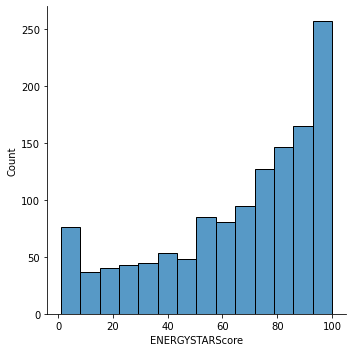

In [51]:
import seaborn as sns
sns.displot(df['ENERGYSTARScore'])

Pour l'etude de l'importance de la variable ENERGYSTARScore, je prend un echantillon du dataset dans lequel la variable est bien definie (pas de NaN). On fera l'etude de l'importance de cette variable sur ce dataset

In [52]:
dfES=df[~df["ENERGYSTARScore"].isna()]
dfES.shape

(1298, 43)

In [53]:
dfES.isna().sum().sort_values(ascending=False).head()

OSEBuildingID                      0
SourceEUIWN(kBtu/sf)               0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseType        0
ThirdLargestPropertyUseTypeGFA     0
dtype: int64

## Dataset sans ENERGYSTARScore
On utilisera un dataset sans la variable ENERGYSTARScore pour faire une etude plus complete.

In [54]:
df1=df.drop(columns=['ENERGYSTARScore'])

In [55]:
df1.isna().sum().sort_values(ascending=False).head()

OSEBuildingID                      0
SourceEUIWN(kBtu/sf)               0
SecondLargestPropertyUseType       0
SecondLargestPropertyUseTypeGFA    0
ThirdLargestPropertyUseType        0
dtype: int64

# Feature engine

## DropConstantFeatures

In [56]:
from feature_engine.selection import DropConstantFeatures
sel_drop = DropConstantFeatures(tol=0.90, variables=None, missing_values='raise')
sel_drop.fit(df1)

DropConstantFeatures(tol=0.9)

In [57]:
sel_drop.features_to_drop_

['DataYear',
 'City',
 'State',
 'NumberofBuildings',
 'YearsENERGYSTARCertified',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'Outlier']

In [58]:
sel_drop.features_to_drop_

['DataYear',
 'City',
 'State',
 'NumberofBuildings',
 'YearsENERGYSTARCertified',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'Outlier']

In [59]:
df1=df1.drop(columns=['DataYear', 'City', 'State', 'NumberofBuildings', 'YearsENERGYSTARCertified',  'DefaultData',
 'ComplianceStatus', 'Outlier'])

In [60]:
df1.shape

(2036, 34)

In [61]:
sel_drop.fit(dfES)

DropConstantFeatures(tol=0.9)

In [62]:
sel_drop.features_to_drop_

['DataYear',
 'City',
 'State',
 'NumberofBuildings',
 'YearsENERGYSTARCertified',
 'SteamUse(kBtu)',
 'Electricity(kBtu)',
 'DefaultData',
 'ComplianceStatus',
 'Outlier']

In [63]:
dfES=dfES.drop(columns=['DataYear',
 'City',
 'State',
 'NumberofBuildings',
 'YearsENERGYSTARCertified',
 'DefaultData',
 'ComplianceStatus',
 'Outlier'])

In [64]:
dfES.shape

(1298, 35)

## DropDuplicateFeatures

In [65]:
from feature_engine.selection import DropDuplicateFeatures

sel_duplicate = DropDuplicateFeatures(variables=None, missing_values='raise')
df1=sel_duplicate.fit_transform(df1)

In [66]:
sel_duplicate.duplicated_feature_sets_


[]

In [67]:
dfES=sel_duplicate.fit_transform(dfES)
sel_duplicate.duplicated_feature_sets_

[]

## Correlated Features
J'utilise cette fonctionalite pour avoir une idee sur les variables correlles uniquement, mais je ne fais pas un transfrom comme le choix des variables a supprimer est aleatoire 

In [68]:
from feature_engine.selection import SmartCorrelatedSelection
sel_correlated = SmartCorrelatedSelection(variables=None, method="pearson", threshold=0.75, missing_values="raise", selection_method="variance",estimator=None)

In [69]:
sel_correlated.fit(df1)

SmartCorrelatedSelection(missing_values='raise', selection_method='variance',
                         threshold=0.75)

In [70]:
sel_correlated.correlated_feature_sets_

[{'LargestPropertyUseTypeGFA',
  'PropertyGFABuilding(s)',
  'PropertyGFATotal',
  'SiteEnergyUse(kBtu)'},
 {'SiteEUI(kBtu/sf)',
  'SiteEUIWN(kBtu/sf)',
  'SourceEUI(kBtu/sf)',
  'SourceEUIWN(kBtu/sf)'},
 {'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'}]

## Correlation avec les variables cibles
On regarde les variables fortement correles aux variables cibles a savoir **TotalGHGEmissions** et **SiteEnergyUse(kBtu)**

### Les variables cibles

In [71]:
y=df1[['SiteEnergyUse(kBtu)', 'TotalGHGEmissions']]

### Remarque : 
Les variables cibles sont fortement correlees, il suffit probablement de faire une etude des hyperparametres sur l'une des variables

In [72]:
y.corr()

,SiteEnergyUse(kBtu),TotalGHGEmissions
SiteEnergyUse(kBtu),1.000000,0.860669
TotalGHGEmissions,0.860669,1.000000


### Les variables correlees avec SiteEnergyUse(kBtu)

In [73]:
corr_energy=df1.corr()['SiteEnergyUse(kBtu)']

In [74]:
corr_energy[corr_energy>0.75]

PropertyGFATotal             0.798337
PropertyGFABuilding(s)       0.813925
LargestPropertyUseTypeGFA    0.838447
SiteEnergyUse(kBtu)          1.000000
TotalGHGEmissions            0.860669
Name: SiteEnergyUse(kBtu), dtype: float64

In [75]:
corr_consom=corr_energy[corr_energy>0.75].index
corr_consom

Index(['PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions'],
      dtype='object')

### Les variables correlees a TotalGHGEmissions

In [76]:
df1.corr()[df1.corr()['TotalGHGEmissions']>0.75]['TotalGHGEmissions']

SiteEnergyUse(kBtu)      0.860669
SiteEnergyUseWN(kBtu)    0.857128
TotalGHGEmissions        1.000000
Name: TotalGHGEmissions, dtype: float64

In [77]:
corr_emiss=df1.corr()[df1.corr()['TotalGHGEmissions']>0.75]['TotalGHGEmissions'].index

In [78]:
corr_emiss

Index(['SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'TotalGHGEmissions'], dtype='object')

## Preparation des datasets pour l'etude

In [79]:
columns_to_drop=['OSEBuildingID','PropertyName','Address', 'ZipCode', 'TaxParcelIdentificationNumber','GHGEmissionsIntensity','SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)',
       'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)']

In [80]:
df1=df1.drop(columns=['ListOfAllPropertyUseTypes'])
df1=df1.drop(columns=columns_to_drop)

In [81]:
dfES=dfES.drop(columns=['ListOfAllPropertyUseTypes'])
dfES=dfES.drop(columns=columns_to_drop)

In [82]:
X=df1.drop(columns=['SiteEnergyUse(kBtu)','TotalGHGEmissions'])

# Train test split

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=42)

# Analyse exploratoire sur train set

In [85]:
X_train.shape

(1425, 20)

In [86]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CouncilDistrictCode,1425.0,4.437895,2.158201,1.000000,2.00000,4.00000,7.000000,7.000000e+00
Latitude,1425.0,47.618716,0.047281,47.500619,47.59549,47.61393,47.653030,4.773387e+01
Longitude,1425.0,-122.332924,0.025480,-122.411820,-122.34429,-122.33272,-122.320389,-1.222210e+02
YearBuilt,1425.0,1964.893333,33.952832,1900.000000,1931.00000,1969.00000,1996.000000,2.015000e+03
NumberofFloors,1425.0,4.568421,6.222444,0.000000,2.00000,3.00000,5.000000,6.300000e+01
PropertyGFATotal,1425.0,117232.797895,302057.634891,11685.000000,30087.00000,50017.00000,114297.000000,9.320156e+06
PropertyGFAParking,1425.0,11293.370526,38981.437930,0.000000,0.00000,0.00000,0.000000,5.126080e+05
PropertyGFABuilding(s),1425.0,105939.427368,291093.330615,3636.000000,28808.00000,48092.00000,98480.000000,9.320156e+06
LargestPropertyUseTypeGFA,1425.0,96735.075789,285355.734159,5656.000000,25000.00000,44340.00000,94470.000000,9.320156e+06
SecondLargestPropertyUseTypeGFA,1425.0,18376.034737,47550.248685,0.000000,0.00000,2680.00000,13534.000000,6.399310e+05


In [87]:
X_train.dtypes

BuildingType                        object
PrimaryPropertyType                 object
CouncilDistrictCode                  int64
Neighborhood                        object
Latitude                           float64
Longitude                          float64
YearBuilt                            int64
NumberofFloors                       int64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
LargestPropertyUseType              object
LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseType        object
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseType         object
ThirdLargestPropertyUseTypeGFA     float64
SteamUse(kBtu)                     float64
Electricity(kBtu)                  float64
NaturalGas(kBtu)                   float64
dtype: object

In [88]:
X_train.corr().style.background_gradient(cmap="Blues")


,CouncilDistrictCode,Latitude,Longitude,YearBuilt,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu)
CouncilDistrictCode,1.000000,0.498522,-0.328398,-0.004211,0.322345,0.088946,0.178463,0.068398,0.055673,0.152231,0.022091,0.190672,-0.022958,-0.082243
Latitude,0.498522,1.000000,-0.062357,0.114067,-0.000184,-0.004345,0.013975,-0.006380,-0.002998,-0.028278,-0.059092,-0.051348,-0.062214,-0.022040
Longitude,-0.328398,-0.062357,1.000000,0.004858,-0.039315,0.019343,-0.031220,0.024252,0.027369,-0.010447,0.008913,-0.004147,0.039440,0.072044
YearBuilt,-0.004211,0.114067,0.004858,1.000000,0.134062,0.073686,0.219288,0.047096,0.045941,0.204205,0.079691,-0.136883,-0.021809,-0.001860
NumberofFloors,0.322345,-0.000184,-0.039315,0.134062,1.000000,0.358028,0.485715,0.306470,0.293291,0.480441,0.192327,0.271249,0.035466,-0.031886
PropertyGFATotal,0.088946,-0.004345,0.019343,0.073686,0.358028,1.000000,0.340691,0.992043,0.982623,0.424899,0.208436,0.190455,0.004715,-0.009218
PropertyGFAParking,0.178463,0.013975,-0.031220,0.219288,0.485715,0.340691,1.000000,0.219610,0.255160,0.492219,0.174658,0.101905,0.020362,-0.025544
PropertyGFABuilding(s),0.068398,-0.006380,0.024252,0.047096,0.306470,0.992043,0.219610,1.000000,0.985464,0.374988,0.192898,0.183982,0.002165,-0.006144
LargestPropertyUseTypeGFA,0.055673,-0.002998,0.027369,0.045941,0.293291,0.982623,0.255160,0.985464,1.000000,0.334641,0.159833,0.188435,0.000343,-0.009281
SecondLargestPropertyUseTypeGFA,0.152231,-0.028278,-0.010447,0.204205,0.480441,0.424899,0.492219,0.374988,0.334641,1.000000,0.603450,0.117981,0.023995,0.037933


# Variables categorielles et numeriques

In [89]:
categ=X_train.dtypes[df.dtypes=='object'].index
categ

Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType'],
      dtype='object')

In [90]:
numeric=X_train.dtypes[X_train.dtypes!='object'].index
numeric

Index(['CouncilDistrictCode', 'Latitude', 'Longitude', 'YearBuilt',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'],
      dtype='object')

# Exploration des variables Categorielles

In [91]:
X_train[categ].describe()

,BuildingType,PrimaryPropertyType,Neighborhood,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType
count,1425,1425,1425,1425,1425,1425
unique,8,24,19,55,44,41
top,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,Office,None,None
freq,1013,200,333,333,591,1021


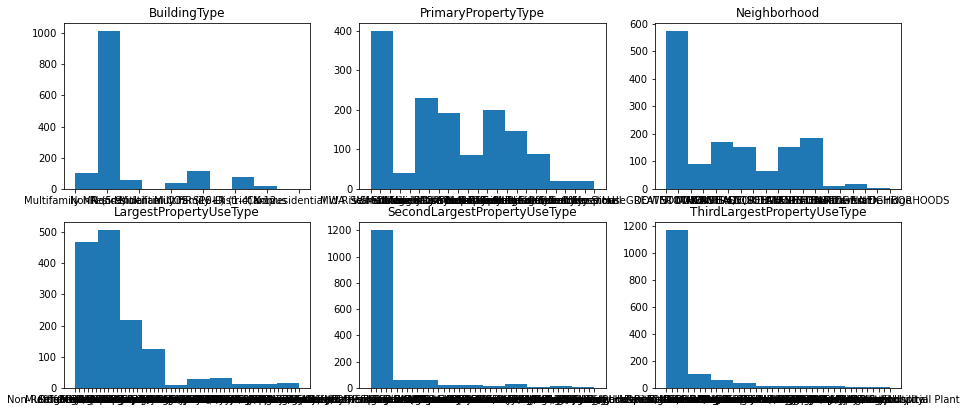

In [92]:
X_val = X_train[categ].values
fig = plt.figure(figsize=(15, 25))
for feat_idx in range(X_val.shape[1]):
    ax = fig.add_subplot(7,3, (feat_idx+1))
    h = ax.hist(X_val[:,feat_idx])
    ax.set_title(X_train[categ].columns[feat_idx])

## Variables numeriques

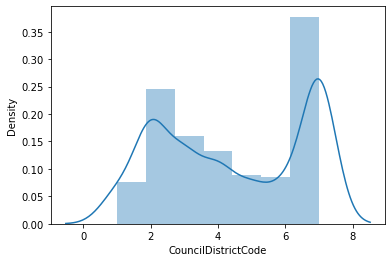

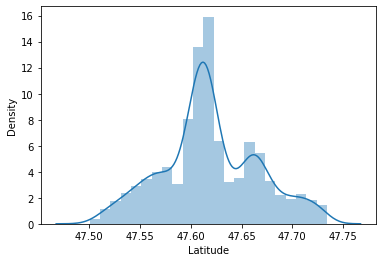

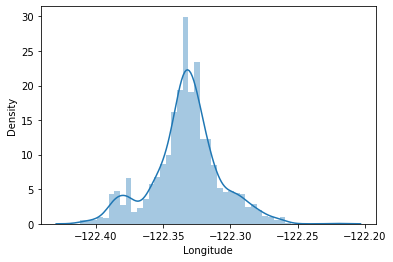

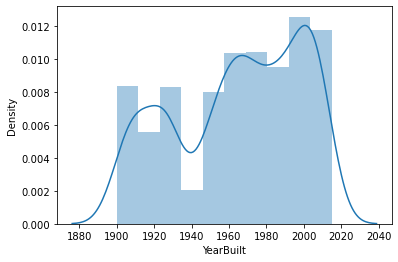

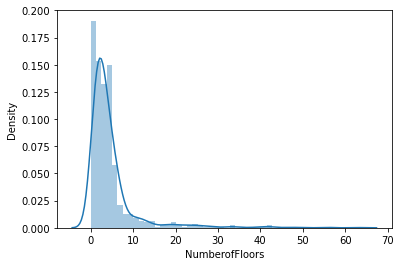

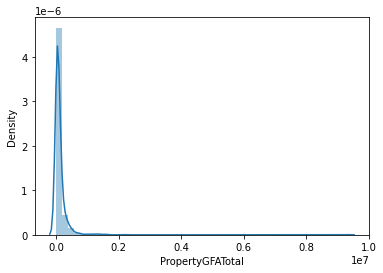

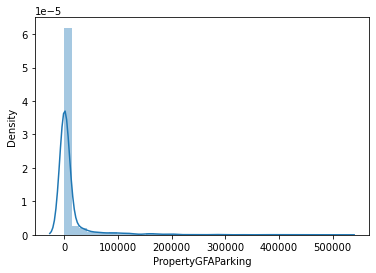

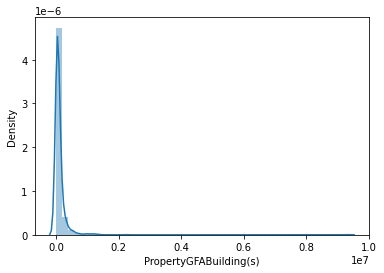

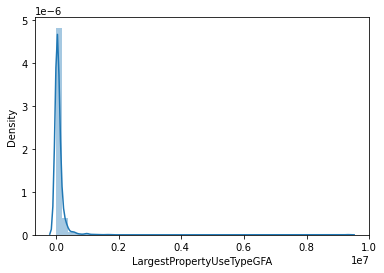

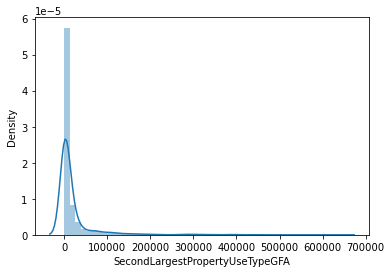

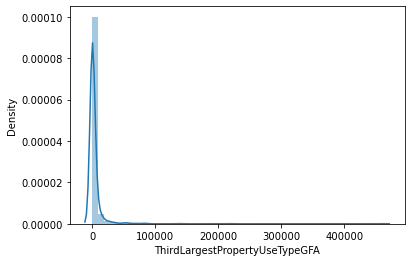

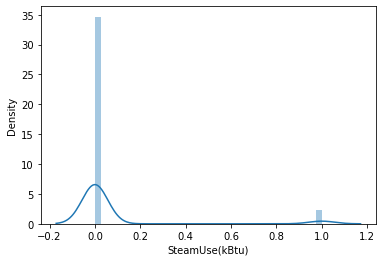

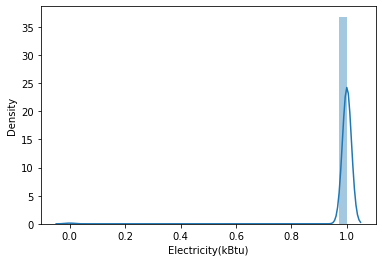

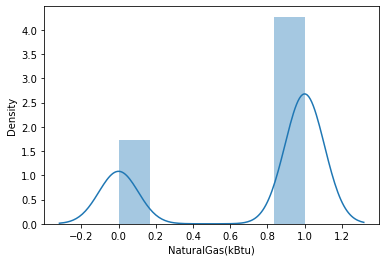

<Figure size 432x288 with 0 Axes>

In [93]:
import seaborn as sns
for indic in numeric:
    d=sns.distplot(X_train[indic])
    fig = plt.figure()


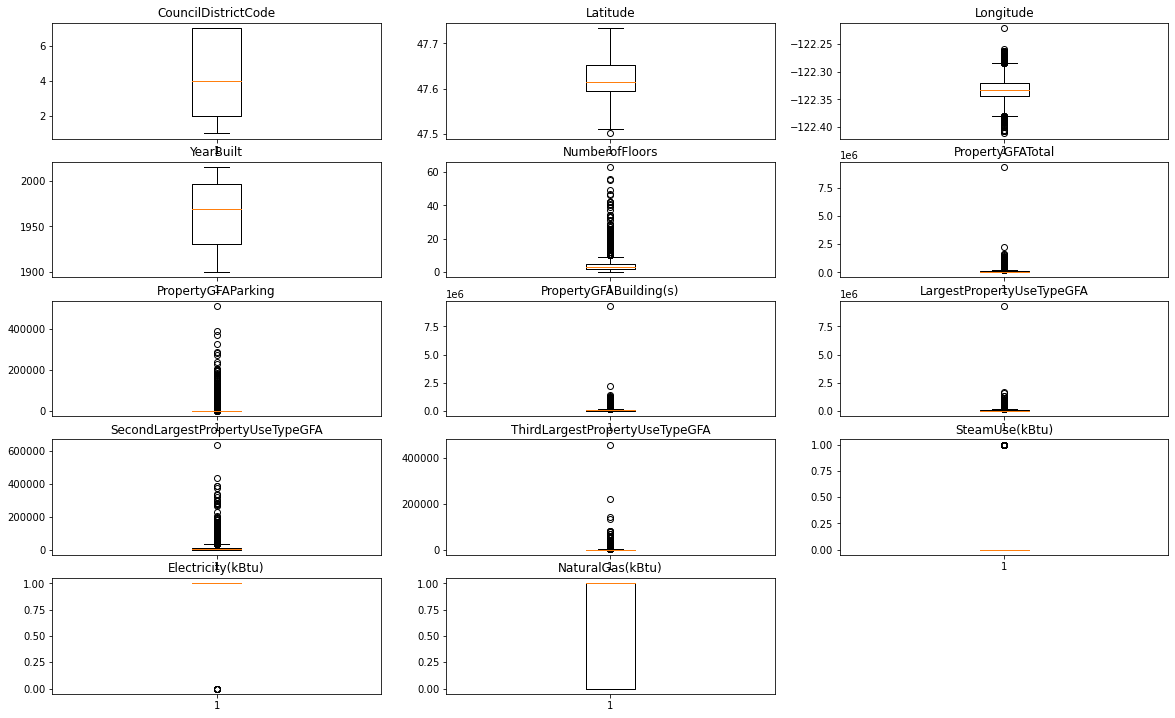

In [94]:
X_num = X_train[numeric].values
fig = plt.figure(figsize=(20, 20))
for feat_idx in range(X_num.shape[1]):
    ax = fig.add_subplot(8,3, (feat_idx+1))
    h = ax.boxplot(X_num[:,feat_idx])
    ax.set_title((X_train[numeric].columns[feat_idx]))

## Distribution des variables numeriques
On divises les variables numeriques en 3 categories: Les variables a distribution normale, les variables discretes et les variables asymetriques (skewed) pour pouvoir appliques les transformations correspondantes a chaque type de distribution

In [95]:
normal=['Latitude', 'Longitude']
discrete=['CouncilDistrictCode', 'YearBuilt']

skewed=['NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseTypeGFA',
       ]
boolean=['SteamUse(kBtu)', 'Electricity(kBtu)',
       'NaturalGas(kBtu)']

## Information sur l'emission et la consommation

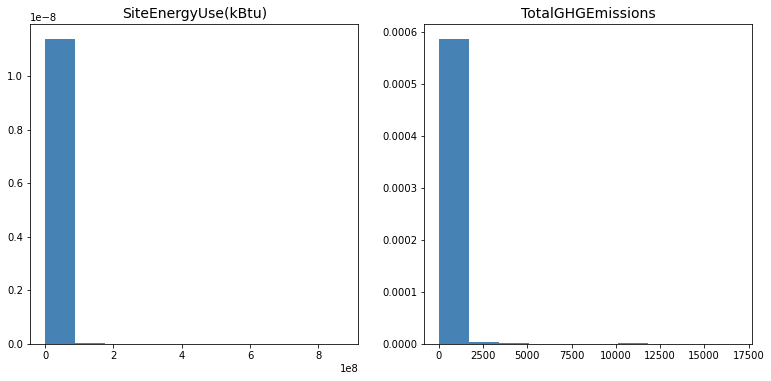

In [96]:
y_consom = y_train.values


fig = plt.figure(figsize=(20, 20))
for feat_idx in range(y_consom.shape[1]):
    ax = fig.add_subplot(3,3, (feat_idx+1))
    h = ax.hist(y_consom[:,feat_idx], color='steelblue', density=True, edgecolor='none')
    ax.set_title(y.columns[feat_idx], fontsize=14)

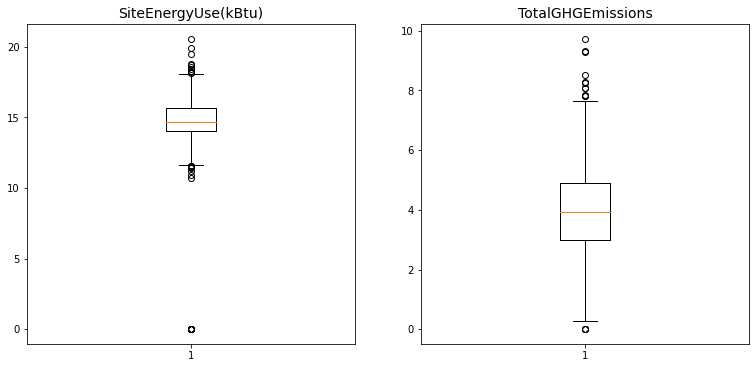

In [97]:
fig = plt.figure(figsize=(20, 20))
for feat_idx in range(y_consom.shape[1]):
    ax = fig.add_subplot(3,3, (feat_idx+1))
    h = ax.boxplot(np.log1p(y_consom[:,feat_idx]))
    ax.set_title(y.columns[feat_idx], fontsize=14)

In [98]:
y.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SiteEnergyUse(kBtu),2036.0,7.668814e+06,2.750964e+07,0.0,1236944.750,2498541.375,6482950.00,8.739237e+08
TotalGHGEmissions,2036.0,1.697973e+02,6.857019e+02,0.0,18.945,49.145,135.14,1.687098e+04


## Remarque
La variable cible **SiteEnergyUse(kBtu)** presente beaucoup de *outliers* dans la partie inferieure. Cela empeche la transformation de la distribution en une distribution normale. Pour remedier a cette situation on enleve ces outliers (Valeur=0) du dataset (un total de consammation d'energie =0 n'etant dans tous les cas pas pertinent pour notre etude)	

count    1425.000000
mean       14.748963
std         1.844490
min         0.000000
25%        14.032706
50%        14.711780
75%        15.655764
max        20.588504
Name: SiteEnergyUse(kBtu), dtype: float64


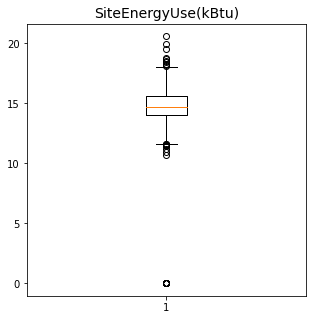

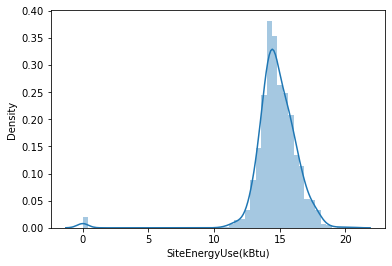

count    1425.000000
mean        3.942584
std         1.437635
min         0.000000
25%         2.976549
50%         3.914420
75%         4.894850
max         9.733410
Name: TotalGHGEmissions, dtype: float64


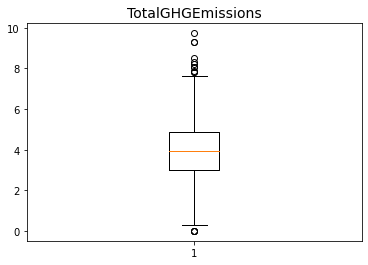

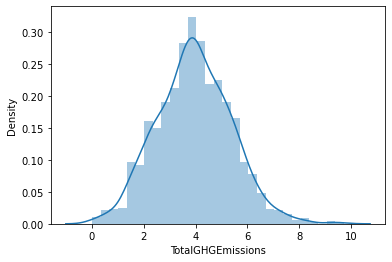

In [99]:
fig = plt.figure(figsize=(5, 5))
for indic in y_train.columns:
    print(np.log1p(y_train[indic]).describe())
    h = plt.boxplot(np.log1p(y_train[indic]))
    plt.title(indic, fontsize=14)
    plt.show()
    sns.distplot(np.log1p(y_train[indic]))
    plt.show()

## Elimination des valeurs nulles pour SiteEnergyUse
On elimine tous les objets ayant une valeur SiteEnergyUse=0 des dataset X et y

In [100]:
a=y_train[y_train['SiteEnergyUse(kBtu)']==0].index

In [101]:
y_train=y_train.drop(index=a)

In [102]:
b=y_test[y_test['SiteEnergyUse(kBtu)']==0].index

In [103]:
y_test=y_test.drop(index=b)
X_test=X_test.drop(index=b)

In [104]:
X_train=X_train.drop(index=a)

## Distribution des variables cibles apres elimination des valeurs aberrantes

count    1413.000000
mean       14.874220
std         1.251656
min        10.698616
25%        14.047842
50%        14.721065
75%        15.665167
max        20.588504
Name: SiteEnergyUse(kBtu), dtype: float64


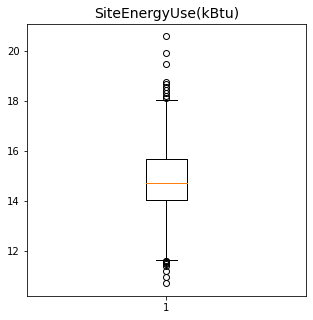

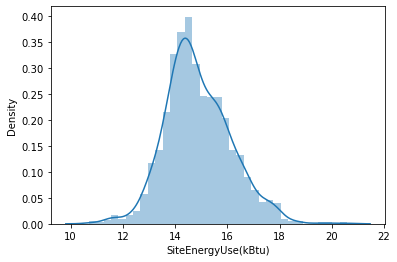

count    1413.000000
mean        3.954087
std         1.427206
min         0.000000
25%         2.989211
50%         3.917011
75%         4.894850
max         9.733410
Name: TotalGHGEmissions, dtype: float64


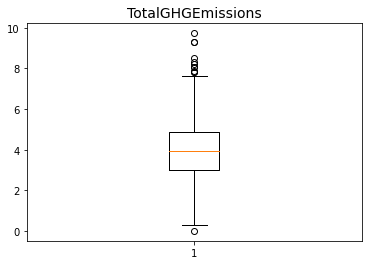

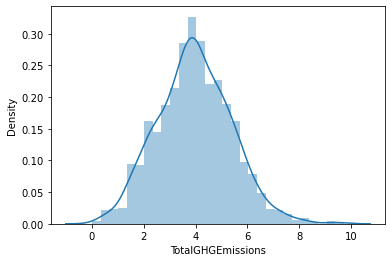

In [105]:
fig = plt.figure(figsize=(5, 5))
for indic in y_train.columns:
    print(np.log1p(y_train[indic]).describe())
    h = plt.boxplot(np.log1p(y_train[indic]))
    plt.title(indic, fontsize=14)
    plt.show()
    sns.distplot(np.log1p(y_train[indic]))
    plt.show()

Apres elimination des valeurs aberrantes la distribution de la variable **SiteEnergyUse(kBtu)** se raproche plus de la normale

In [106]:
X_train.to_csv('XTrain.csv', index=False)
X_test.to_csv('XTest.csv', index=False)
y_train.to_csv('yTrain.csv', index=False)
y_test.to_csv('yTest.csv', index=False)

In [107]:
dfES.to_csv('dfEnergyScore.csv', index=False)

# Transformation des variables
Preparation des pipelines pour la transformation des variables selon leur type ou leur distribution

## Transformation des variables categorique 


In [108]:
from sklearn.pipeline import Pipeline
import category_encoders as ce

In [109]:
encoder = ce.BackwardDifferenceEncoder(verbose=3, cols=categ, mapping=None, drop_invariant=True, return_df=True, handle_unknown='value', handle_missing='value')
encoder.fit(X_train[categ])
ncateg=encoder.get_feature_names()

In [110]:
encoder1 = ce.BackwardDifferenceEncoder(verbose=3, cols=categ, mapping=None, drop_invariant=True, return_df=True, handle_unknown='value', handle_missing='value')

## Transformation des variables numeriques
Les variables numeriques sont divisees en plusieurs categories selon leur distribution. A chaque categorie on applique une forme de transformation

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import FunctionTransformer

### Les variables Skewed
On applique une transformation par log(x+1) pour prendre en compte les 0, puis un RobustScaler comme les distributions sont asymetriques meme apres logtransformation. Le robust trainer effectue la normalisation a partir de la mediane au lieu de la moyenne

In [112]:
log_pipeline=Pipeline(steps=[('transformer', FunctionTransformer(np.log1p)),('scaler',RobustScaler())])

In [113]:
ylog_pipeline=Pipeline(steps=[('transformer', FunctionTransformer(np.log1p)),('scaler',StandardScaler())])

## ColumnTransformer
Pour appliquer les transformation sur toutes les varibales on utilise le ColumnTransformer

In [115]:
from sklearn.compose import ColumnTransformer
full_pipeline = ColumnTransformer([('normal',scaler, normal), ('discret', scaler, discrete), ('skewed', log_pipeline, skewed) ,('categ', encoder1, categ)],remainder='passthrough')

In [116]:
full_pipeline.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('normal', StandardScaler(),
                                 ['Latitude', 'Longitude']),
                                ('discret', StandardScaler(),
                                 ['CouncilDistrictCode', 'YearBuilt']),
                                ('skewed',
                                 Pipeline(steps=[('transformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('scaler', RobustScaler())]),
                                 ['NumberofFloors', 'PropertyGFATotal',
                                  'PropertyGFAParking',
                                  'Proper...
                                 BackwardDifferenceEncoder(cols=Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType'],
      dtype='obje

In [117]:
X_train=full_pipeline.transform(X_train)
X_test=full_pipeline.transform(X_test)
ylog_pipeline.fit(y_train)

y_test=ylog_pipeline.transform(y_test)

y_train=ylog_pipeline.transform(y_train)

In [118]:
X_train.shape

(1413, 199)

## Recuperation des feature names et reconstruction des dataframes
On utilisera les datasets transformer pour effectuer les regressions dans les notebooks suivants

In [119]:
col=np.concatenate((normal,discrete,skewed,ncateg,boolean), axis=0, out=None, dtype=None, casting="same_kind")

X_train=pd.DataFrame(X_train, columns=col)
X_test=pd.DataFrame(X_test, columns=col)
y_train=pd.DataFrame(y_train, columns=['SiteEnergyUse(kBtu)','TotalGHGEmissions'])
y_test=pd.DataFrame(y_test, columns=['SiteEnergyUse(kBtu)','TotalGHGEmissions'])

In [120]:
X_train.to_csv('XTrainTrans.csv', index=False)
X_test.to_csv('XTestTrans.csv', index=False)
y_train.to_csv('yTrainTrans.csv', index=False)
y_test.to_csv('yTestTrans.csv', index=False)

## Distribution des variables apres transformation

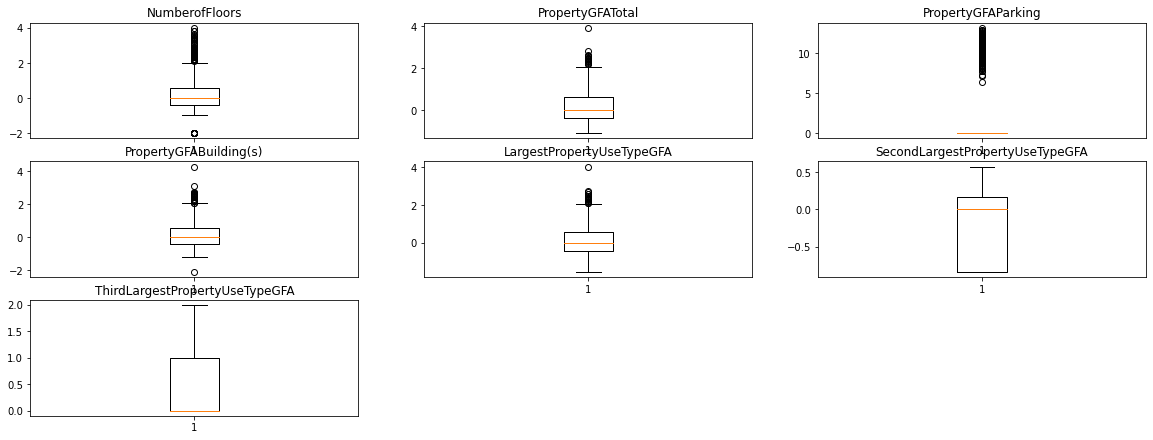

In [121]:
X_num = X_train[skewed].values
fig = plt.figure(figsize=(20, 20))
for feat_idx in range(X_num.shape[1]):
    ax = fig.add_subplot(8,3, (feat_idx+1))
    h = ax.boxplot(X_num[:,feat_idx])
    ax.set_title((X_train[skewed].columns[feat_idx]))

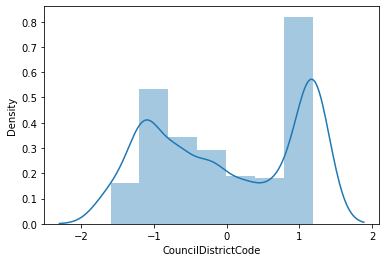

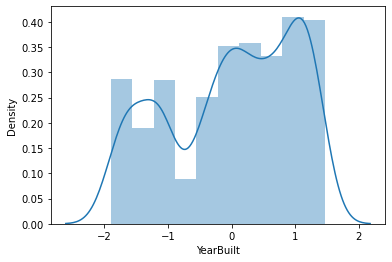

<Figure size 432x288 with 0 Axes>

In [122]:
import seaborn as sns
for indic in discrete:
    d=sns.distplot(X_train[indic])
    fig = plt.figure()

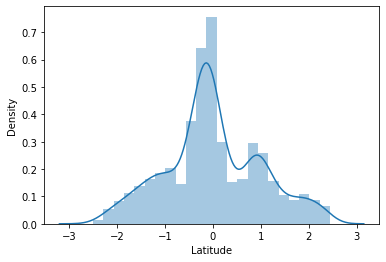

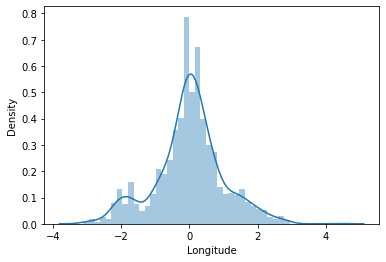

<Figure size 432x288 with 0 Axes>

In [123]:
import seaborn as sns
for indic in normal:
    d=sns.distplot(X_train[indic])
    fig = plt.figure()

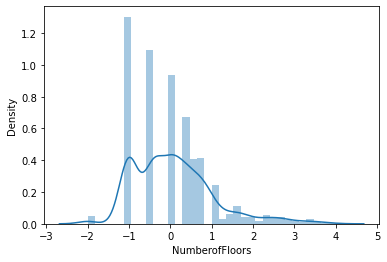

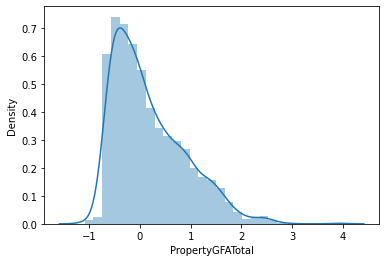

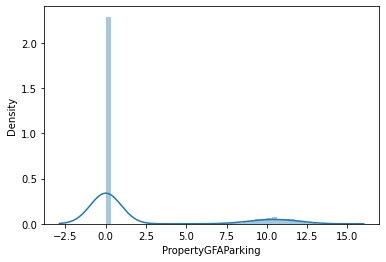

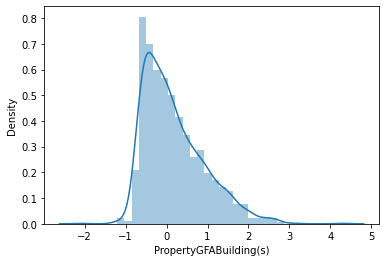

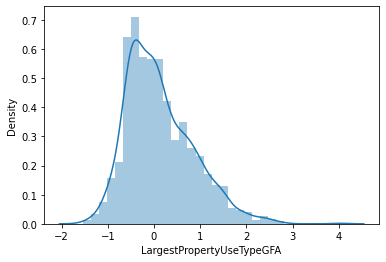

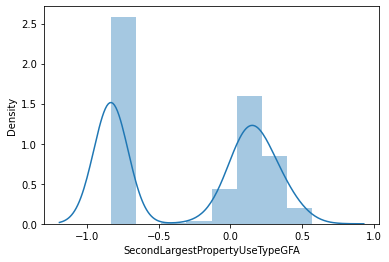

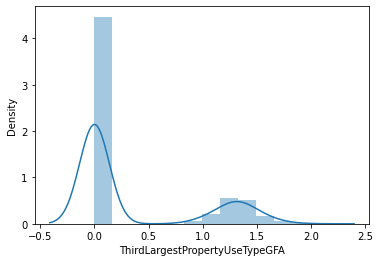

<Figure size 432x288 with 0 Axes>

In [124]:
import seaborn as sns
for indic in skewed:
    d=sns.distplot(X_train[indic])
    fig = plt.figure()

## Le dataset avec ENERGYSTARScore
On verifie la distibution des variables cibles transformees dans le dataset avec ENERGYSTARScore, cette distribution semble normale pour les 2 variables en questions , il n'est donc pas necessaire d'eliminer les valeurs aberrantes pour ce dataset

In [125]:
energyCorr=dfES.corr()['SiteEnergyUse(kBtu)']
energyCorr=energyCorr[energyCorr>0.75]
energyCorr.index

Index(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], dtype='object')

In [126]:
energyCorr=dfES.corr()['TotalGHGEmissions']
energyCorr=energyCorr[energyCorr>0.75]
energyCorr.index

Index(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions'], dtype='object')

In [127]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(dfES, 0.75)
print('correlated features: ', len(set(corr_features)) )

correlated features:  4


In [128]:
corr_features

{'LargestPropertyUseTypeGFA',
 'PropertyGFABuilding(s)',
 'SecondLargestPropertyUseTypeGFA',
 'TotalGHGEmissions'}

In [129]:
yES=dfES[['SiteEnergyUse(kBtu)','TotalGHGEmissions']]

In [130]:
XES=dfES.drop(columns=['SiteEnergyUse(kBtu)','TotalGHGEmissions'])

In [131]:
XES_train, XES_test, yES_train, yES_test=train_test_split(XES,yES,test_size=0.3, random_state=42)

In [132]:
encoder.fit(XES_train[categ])
ncateg=encoder.get_feature_names()

In [133]:
len(ncateg)

123

In [134]:
normal=['Latitude', 'Longitude','ENERGYSTARScore']

In [135]:
normal

['Latitude', 'Longitude', 'ENERGYSTARScore']

In [136]:
full_pipelineES = ColumnTransformer([('normal',scaler, normal), ('discret', scaler, discrete), ('skewed', log_pipeline, skewed) ,('categ', encoder1, categ)],remainder='passthrough')

In [137]:
full_pipelineES.fit(XES_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('normal', StandardScaler(),
                                 ['Latitude', 'Longitude', 'ENERGYSTARScore']),
                                ('discret', StandardScaler(),
                                 ['CouncilDistrictCode', 'YearBuilt']),
                                ('skewed',
                                 Pipeline(steps=[('transformer',
                                                  FunctionTransformer(func=<ufunc 'log1p'>)),
                                                 ('scaler', RobustScaler())]),
                                 ['NumberofFloors', 'PropertyGFATotal',
                                  'PropertyG...
                                 BackwardDifferenceEncoder(cols=Index(['BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'LargestPropertyUseType', 'SecondLargestPropertyUseType',
       'ThirdLargestPropertyUseType'],
      dtype='object'),
                            

In [138]:
XES_train=full_pipelineES.transform(XES_train)
XES_test=full_pipelineES.transform(XES_test)
ylog_pipeline.fit(yES_train)

yES_test=ylog_pipeline.transform(yES_test)

yES_train=ylog_pipeline.transform(yES_train)

In [139]:
col=np.concatenate((normal,discrete,skewed,ncateg,boolean), axis=0, out=None, dtype=None, casting="same_kind")

XES_train=pd.DataFrame(XES_train, columns=col)
XES_test=pd.DataFrame(XES_test, columns=col)
yES_train=pd.DataFrame(yES_train, columns=['SiteEnergyUse(kBtu)','TotalGHGEmissions'])
yES_test=pd.DataFrame(yES_test, columns=['SiteEnergyUse(kBtu)','TotalGHGEmissions'])

In [140]:
XES_train.to_csv('XESTrainTrans.csv', index=False)
XES_test.to_csv('XESTestTrans.csv', index=False)
yES_train.to_csv('yESTrainTrans.csv', index=False)
yES_test.to_csv('yESTestTrans.csv', index=False)

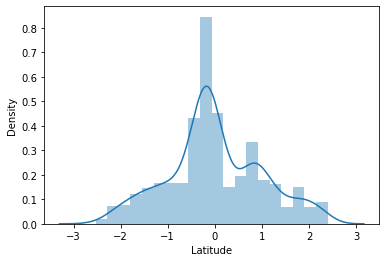

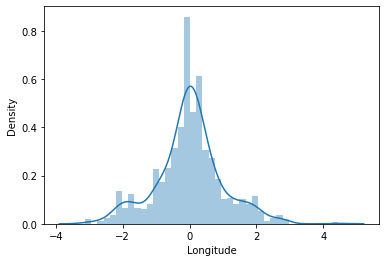

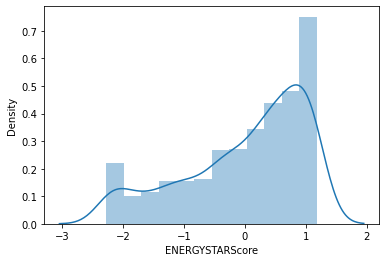

<Figure size 432x288 with 0 Axes>

In [141]:
import seaborn as sns
for indic in normal:
    d=sns.distplot(XES_train[indic])
    fig = plt.figure()

count    606.000000
mean       0.036522
std        1.047338
min       -4.292208
25%       -0.669080
50%       -0.037248
75%        0.712564
max        3.689799
Name: SiteEnergyUse(kBtu), dtype: float64


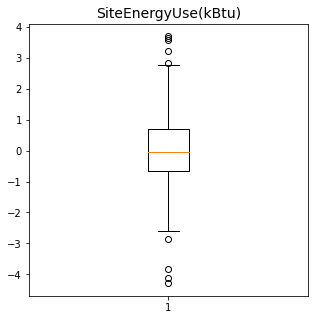

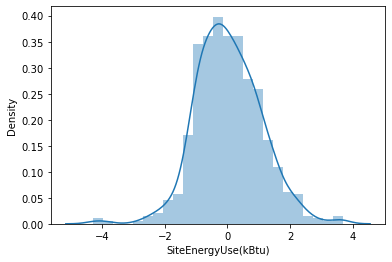

count    606.000000
mean       0.021141
std        1.014194
min       -2.711086
25%       -0.646854
50%       -0.009916
75%        0.745161
max        3.829765
Name: TotalGHGEmissions, dtype: float64


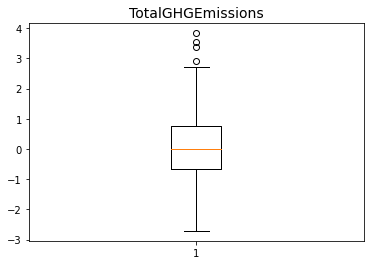

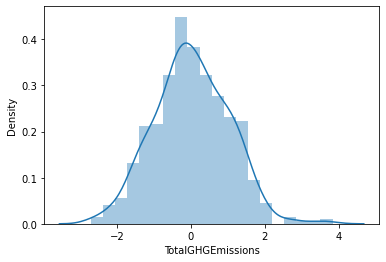

In [142]:
fig = plt.figure(figsize=(5, 5))
for indic in y_test.columns:
    print(y_test[indic].describe())
    h = plt.boxplot(y_test[indic])
    plt.title(indic, fontsize=14)
    plt.show()
    sns.distplot(y_test[indic])
    plt.show()

Le probleme des valeurs aberrantes dans **SiteEnergyUse(kBtu)** n'apparait pas dans le dataset contenant *ENERGYSTARScore*

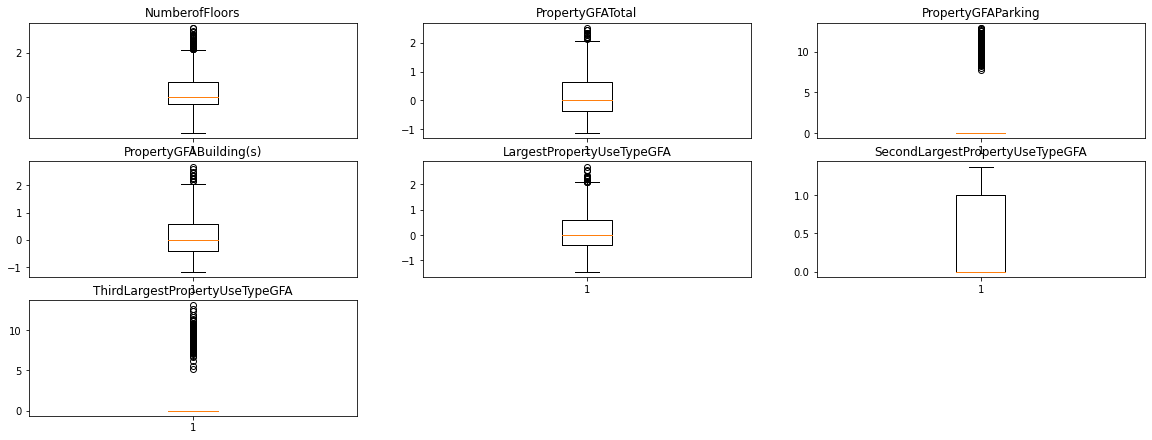

In [143]:
X_num = XES_train[skewed].values
fig = plt.figure(figsize=(20, 20))
for feat_idx in range(X_num.shape[1]):
    ax = fig.add_subplot(8,3, (feat_idx+1))
    h = ax.boxplot(X_num[:,feat_idx])
    ax.set_title((XES_train[skewed].columns[feat_idx]))